In [34]:
# Cell 1: Load raw kidney disease dataset and inspect structure
# This cell imports necessary libraries, loads the CSV file,
# and displays the first few rows along with basic dataset info.

import pandas as pd
import numpy as np

kidney_df = kidney_df = pd.read_csv("../Dataset/kidney_disease.csv")


print("Original kidney dataset reloaded.")
display(kidney_df.head())
print("\nInfo:")
print(kidney_df.info())


Original kidney dataset reloaded.


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null

In [35]:
# Cell 2: Initial preprocessing of the kidney dataset
# - Create a working copy of the raw dataframe
# - Remove the 'id' column (not a predictive feature)
# - Standardize all text columns by lowercasing and stripping whitespace
# - Replace ambiguous values like "?" with NaN
# - Display remaining missing values for further cleaning


kidney = kidney_df.copy()

if "id" in kidney.columns:
    kidney = kidney.drop(columns=["id"])

for col in kidney.select_dtypes(include="object").columns:
    kidney[col] = kidney[col].astype(str).str.strip().str.lower().replace("?", np.nan)

print("Columns after dropping 'id':")
print(kidney.columns)

print("\nMissing values per column:")
print(kidney.isnull().sum())
kidney.head()


Columns after dropping 'id':
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Missing values per column:
age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                1
wc                 1
rc                 1
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,nan,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,nan,normal,notpresent,notpresent,NaN,...,38,6000,nan,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,nan,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [36]:
# Cell 3: Encode categorical values and convert all features to numeric
# - Map target labels ('ckd'/'notckd') to binary values
# - Convert common categorical responses (yes/no, normal/abnormal, etc.) to 0/1
# - Convert all remaining object-type columns to numeric (coercing invalid values to NaN)
# - Display updated missing value counts after conversion


kidney_clean = kidney.copy()


kidney_clean["classification"] = kidney_clean["classification"].replace({
    "ckd": 1,
    "notckd": 0,
    "ckd\t": 1   
})

binary_map = {
    "yes": 1,
    "no": 0,
    "present": 1,
    "notpresent": 0,
    "good": 1,
    "poor": 0
}

for col in kidney_clean.columns:
    if kidney_clean[col].dtype == "object":
        kidney_clean[col] = kidney_clean[col].replace(binary_map)

for col in kidney_clean.columns:
    kidney_clean[col] = pd.to_numeric(kidney_clean[col], errors='coerce')

print("Missing values after conversion:")
print(kidney_clean.isnull().sum())


Missing values after conversion:
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               400
pc                400
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64


In [37]:
# Cell 4: Define, train, and evaluate multiple ML models for kidney disease
# - Import classifiers, performance metrics, and pipeline utilities
# - Build pipelines for each model using SimpleImputer + classifier
# - Train all models on the training set
# - Generate predictions and compute evaluation metrics (accuracy, precision, recall, F1)
# - Store results in a dataframe for comparison and later model selection

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# --- Define models wrapped in a Pipeline (Imputer + Model) ---

models_kidney = {
    "Logistic Regression": make_pipeline(
        SimpleImputer(strategy="median"),
        LogisticRegression(max_iter=1000)
    ),
    "SVM": make_pipeline(
        SimpleImputer(strategy="median"),
        SVC(probability=True)
    ),
    "KNN": make_pipeline(
        SimpleImputer(strategy="median"),
        KNeighborsClassifier()
    ),
    "Decision Tree": make_pipeline(
        SimpleImputer(strategy="median"),
        DecisionTreeClassifier(random_state=42)
    ),
    "Random Forest": make_pipeline(
        SimpleImputer(strategy="median"),
        RandomForestClassifier(random_state=42)
    ),
    "Naive Bayes": make_pipeline(
        SimpleImputer(strategy="median"),
        GaussianNB()
    ),
    "Gradient Boosting": make_pipeline(
        SimpleImputer(strategy="median"),
        GradientBoostingClassifier(random_state=42)
    ),
    "XGBoost": make_pipeline(
        SimpleImputer(strategy="median"),
        XGBClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=4,
            subsample=0.8,
            colsample_bytree=0.8,
            eval_metric="logloss",
            random_state=42,
        )
    ),
}

results = []
kidney_trained_models = {}

print("Models being trained:")
print(list(models_kidney.keys()))
print("-" * 60)

for name, model in models_kidney.items():
    print(f"Training {name}...")
    model.fit(X_kidney_train, y_kidney_train)   # <-- use DataFrames directly

    kidney_trained_models[name] = model

    # Predictions
    y_train_pred = model.predict(X_kidney_train)
    y_test_pred = model.predict(X_kidney_test)

    # Metrics
    train_acc = accuracy_score(y_kidney_train, y_train_pred)
    test_acc  = accuracy_score(y_kidney_test, y_test_pred)
    prec      = precision_score(y_kidney_test, y_test_pred)
    rec       = recall_score(y_kidney_test, y_test_pred)
    f1        = f1_score(y_kidney_test, y_test_pred)

    results.append({
        "Model": name,
        "Train_Accuracy": train_acc,
        "Test_Accuracy": test_acc,
        "Precision": prec,
        "Recall": rec,
        "F1_Score": f1,
    })

    print(f"{name:18s} -> Train: {train_acc:.4f}, Test: {test_acc:.4f}, F1: {f1:.4f}")
    print("-" * 60)

kidney_results_df = pd.DataFrame(results).set_index("Model")

print("\nSummary of model performance (Kidney):")
display(kidney_results_df)


Models being trained:
['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes', 'Gradient Boosting', 'XGBoost']
------------------------------------------------------------
Training Logistic Regression...
Logistic Regression -> Train: 0.9563, Test: 0.9625, F1: 0.9691
------------------------------------------------------------
Training SVM...
SVM                -> Train: 0.6250, Test: 0.6250, F1: 0.7692
------------------------------------------------------------
Training KNN...
KNN                -> Train: 0.8219, Test: 0.6625, F1: 0.7216
------------------------------------------------------------
Training Decision Tree...
Decision Tree      -> Train: 1.0000, Test: 1.0000, F1: 1.0000
------------------------------------------------------------
Training Random Forest...
Random Forest      -> Train: 1.0000, Test: 1.0000, F1: 1.0000
------------------------------------------------------------
Training Naive Bayes...
Naive Bayes        -> Train: 0.9594, Test:

,Train_Accuracy,Test_Accuracy,Precision,Recall,F1_Score
Model,,,,,
Logistic Regression,0.956250,0.9625,1.000000,0.94,0.969072
SVM,0.625000,0.6250,0.625000,1.00,0.769231
KNN,0.821875,0.6625,0.744681,0.70,0.721649
Decision Tree,1.000000,1.0000,1.000000,1.00,1.000000
Random Forest,1.000000,1.0000,1.000000,1.00,1.000000
Naive Bayes,0.959375,0.9750,1.000000,0.96,0.979592
Gradient Boosting,1.000000,0.9875,1.000000,0.98,0.989899
XGBoost,1.000000,0.9875,1.000000,0.98,0.989899


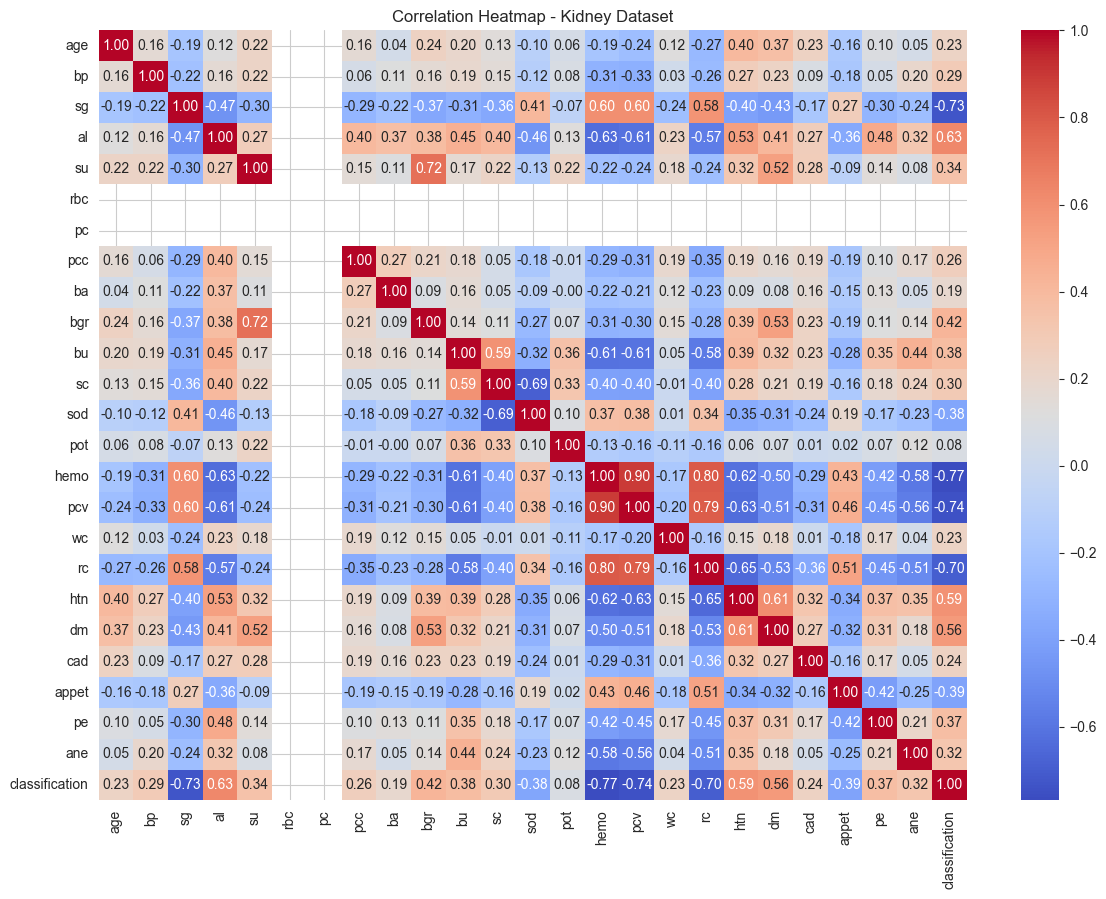

In [38]:
# Cell 5: Visualize feature correlations using a heatmap
# - Computes the correlation matrix of the cleaned kidney dataset
# - Displays a color-coded heatmap to highlight linear relationships between features
# - Helps identify redundant or highly correlated predictors

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(kidney_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap - Kidney Dataset")
plt.show()


In [39]:
# Cell 6: Compare model performance (bias–variance analysis)
# - Iterates through the results dataframe to compare train and test accuracy
# - Computes the difference between train and test scores to detect underfitting/overfitting
# - Helps identify which models generalize best on unseen data

print("Train vs Test Accuracy for each model (Kidney):\n")

for model_name, row in kidney_results_df.iterrows():
    train_acc = row["Train_Accuracy"]
    test_acc  = row["Test_Accuracy"]
    diff      = train_acc - test_acc
    print(f"{model_name:20s} -> Train: {train_acc:.3f}, Test: {test_acc:.3f}, Diff (Train - Test): {diff:.3f}")


Train vs Test Accuracy for each model (Kidney):

Logistic Regression  -> Train: 0.956, Test: 0.963, Diff (Train - Test): -0.006
SVM                  -> Train: 0.625, Test: 0.625, Diff (Train - Test): 0.000
KNN                  -> Train: 0.822, Test: 0.662, Diff (Train - Test): 0.159
Decision Tree        -> Train: 1.000, Test: 1.000, Diff (Train - Test): 0.000
Random Forest        -> Train: 1.000, Test: 1.000, Diff (Train - Test): 0.000
Naive Bayes          -> Train: 0.959, Test: 0.975, Diff (Train - Test): -0.016
Gradient Boosting    -> Train: 1.000, Test: 0.988, Diff (Train - Test): 0.012
XGBoost              -> Train: 1.000, Test: 0.988, Diff (Train - Test): 0.012


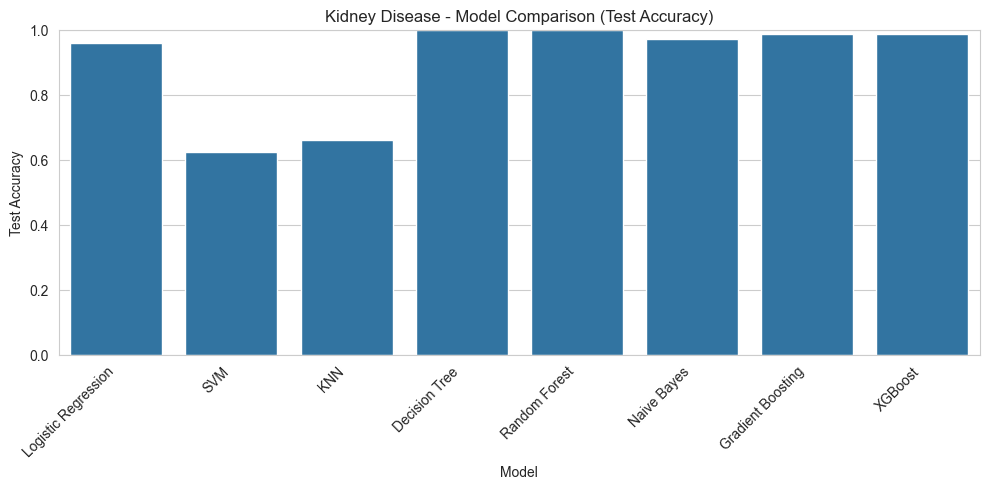

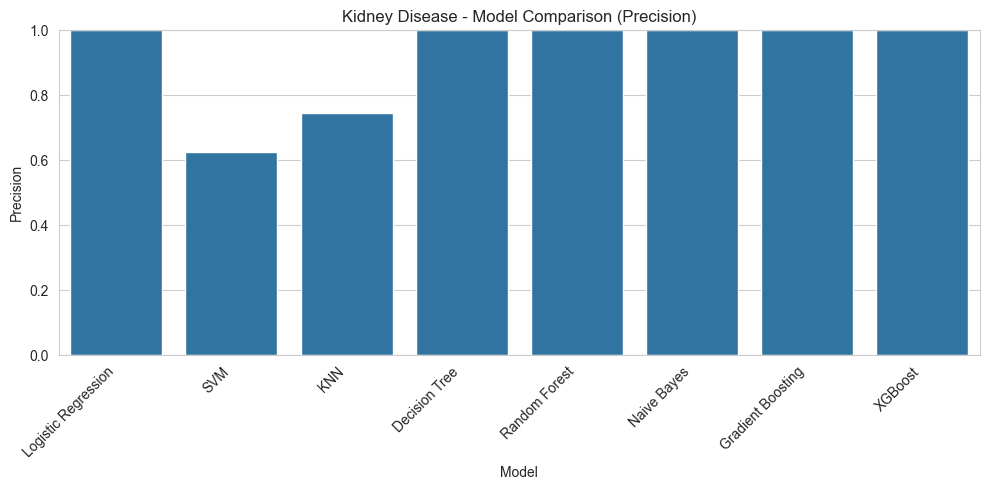

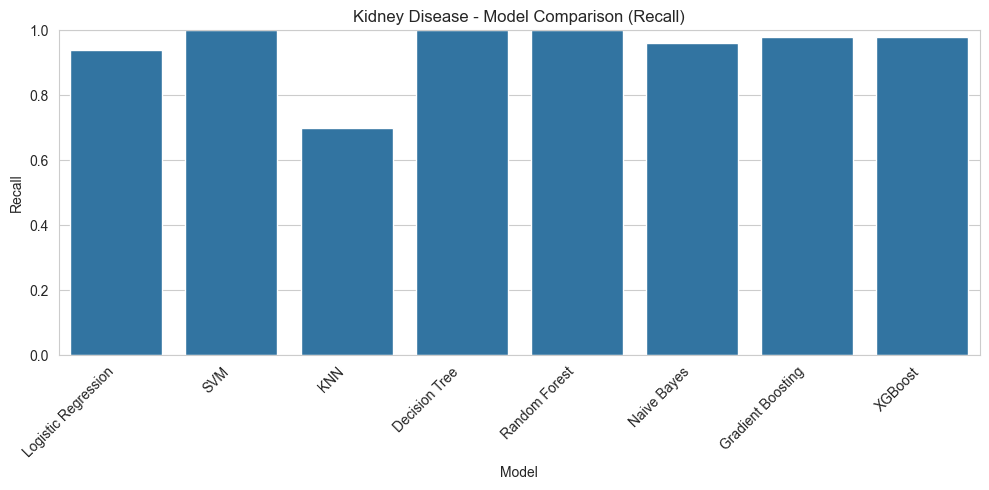

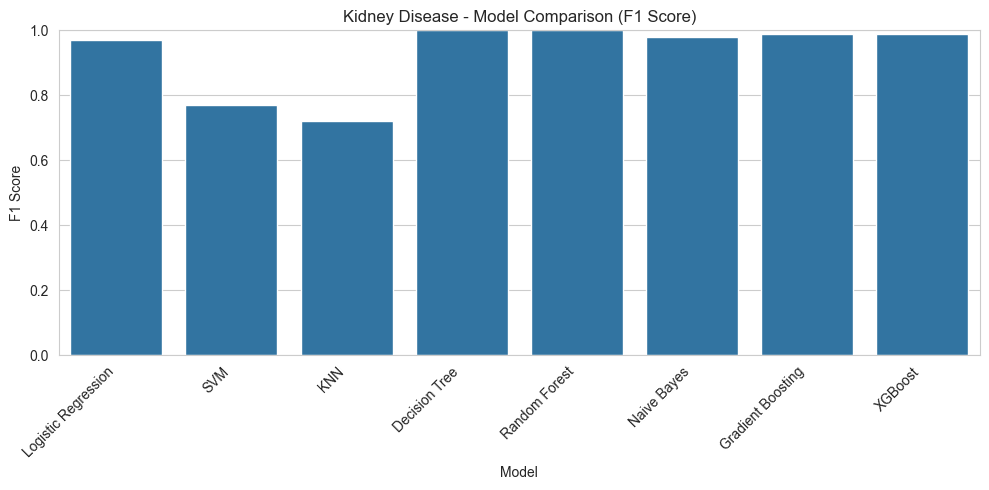

In [40]:
# Cell 7: Visual comparison of model performance metrics
# - Creates bar plots for key evaluation metrics (accuracy, precision, recall, F1-score)
# - Provides an intuitive visual comparison of how each model performs
# - Supports easy identification of the strongest overall model

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

metrics_to_plot = ["Test_Accuracy", "Precision", "Recall", "F1_Score"]

for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=kidney_results_df.index, y=kidney_results_df[metric].values)
    plt.xticks(rotation=45, ha="right")
    plt.ylim(0, 1)
    plt.ylabel(metric.replace("_", " "))
    plt.title(f"Kidney Disease - Model Comparison ({metric.replace('_', ' ')})")
    plt.tight_layout()
    plt.show()


<Figure size 400x400 with 0 Axes>

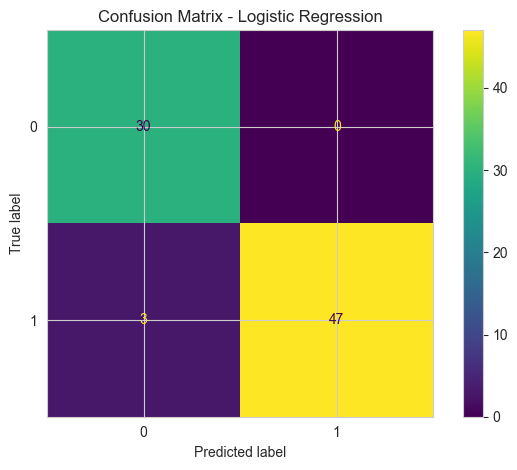

<Figure size 400x400 with 0 Axes>

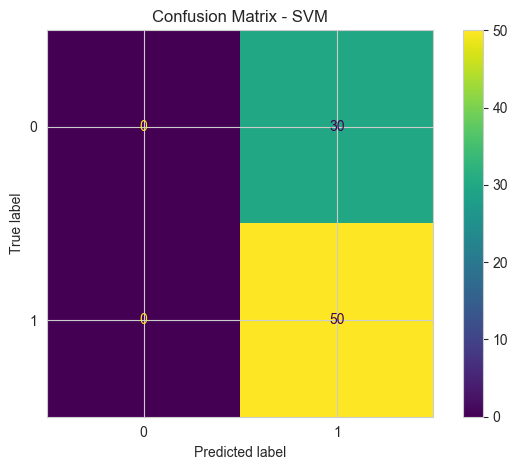

<Figure size 400x400 with 0 Axes>

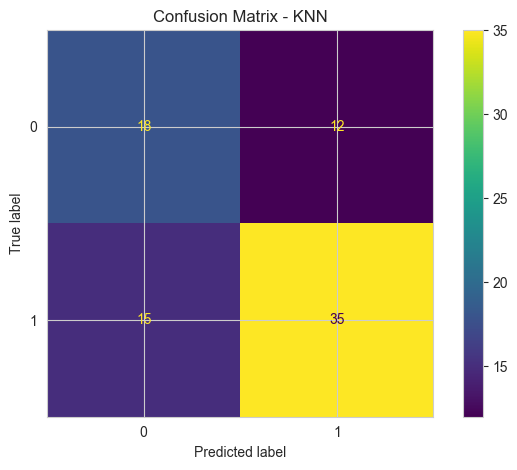

<Figure size 400x400 with 0 Axes>

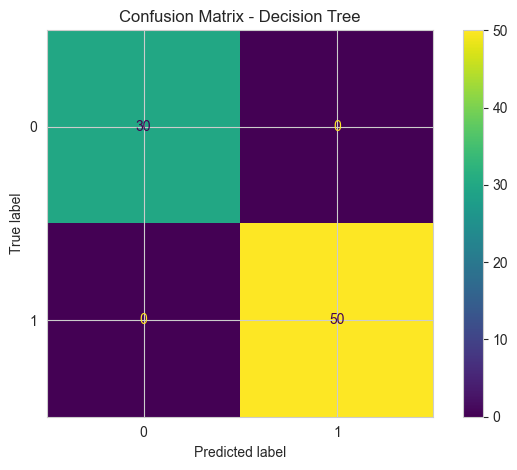

<Figure size 400x400 with 0 Axes>

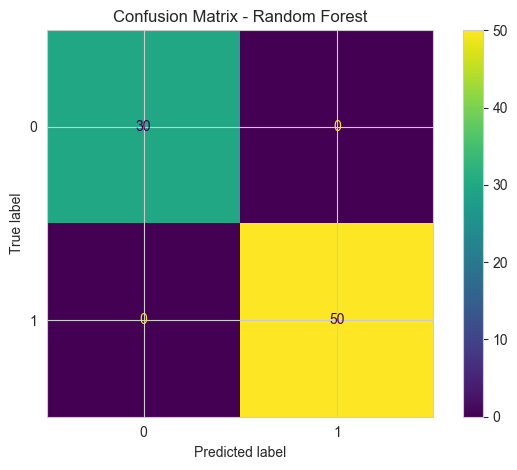

<Figure size 400x400 with 0 Axes>

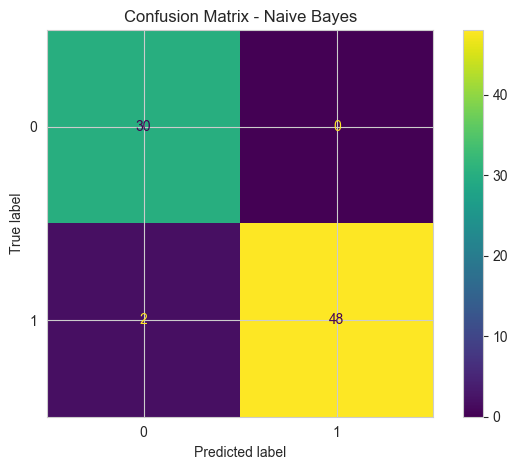

<Figure size 400x400 with 0 Axes>

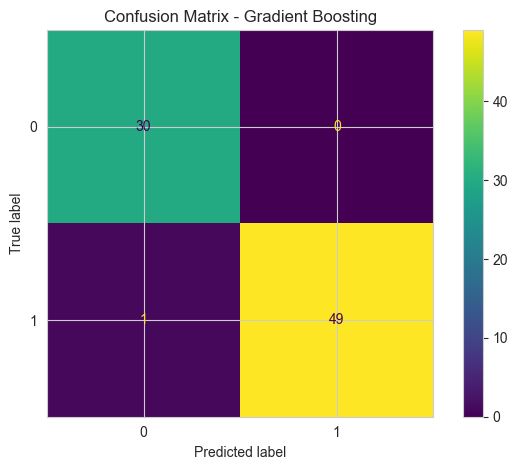

<Figure size 400x400 with 0 Axes>

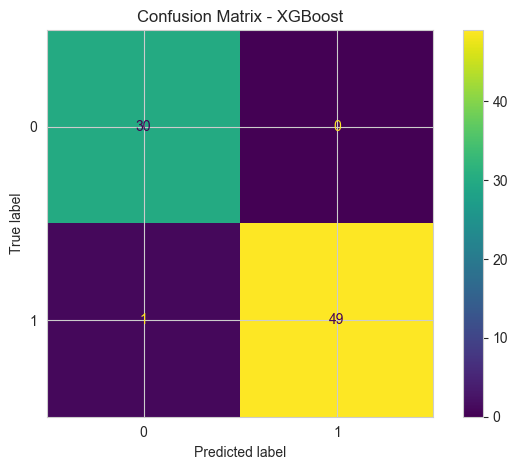

In [41]:
# Cell 8: Plot confusion matrices for all trained models
# - Generates a confusion matrix for each model to visualize classification performance
# - Shows true vs. predicted labels, highlighting types of errors (FP, FN)
# - Useful for understanding model behavior beyond overall accuracy scores

for name, model in kidney_trained_models.items():
    y_pred = model.predict(X_kidney_test)

    cm = confusion_matrix(y_kidney_test, y_pred)
    
    plt.figure(figsize=(4,4))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d")
    plt.title(f"Confusion Matrix - {name}")
    plt.tight_layout()
    plt.show()


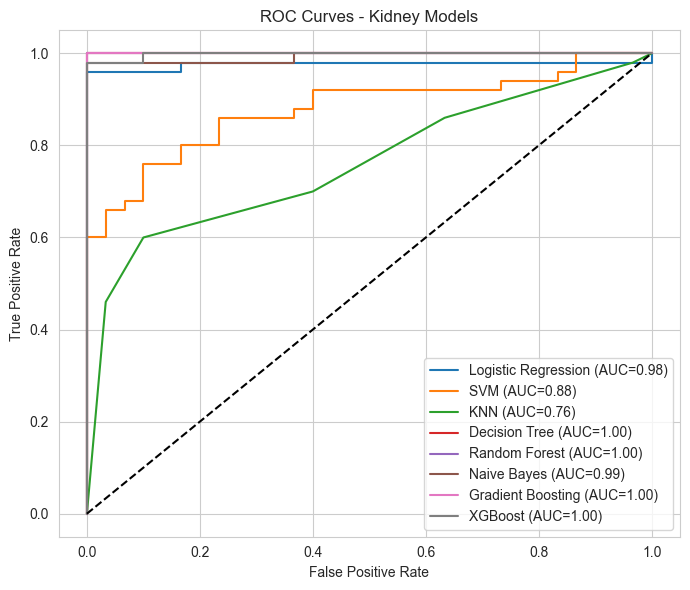

In [42]:
# Cell 9: Plot ROC curves and compute AUC for all models
# - Generates ROC (Receiver Operating Characteristic) curves for each classifier
# - Uses predicted probabilities or decision scores to calculate TPR vs. FPR
# - Computes and displays AUC values to compare model discrimination ability
# - Helps evaluate how well each model separates CKD vs. non-CKD cases

plt.figure(figsize=(7,6))

for name, model in kidney_trained_models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_kidney_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_kidney_test)
    else:
        continue

    fpr, tpr, _ = roc_curve(y_kidney_test, y_proba)
    auc = roc_auc_score(y_kidney_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Kidney Models")
plt.legend()
plt.tight_layout()
plt.show()


In [43]:
# Cell 10: Identify and evaluate the best-performing kidney model
# - Selects the model with the highest test accuracy
# - Retrieves the corresponding trained model from the dictionary
# - Generates a detailed classification report (precision, recall, F1)
# - Provides deeper insight into the best model’s performance on each class

best_kidney_model_name = kidney_results_df["Test_Accuracy"].idxmax()
best_kidney_model = kidney_trained_models[best_kidney_model_name]

print(f"Best Kidney Model: {best_kidney_model_name}\n")

y_pred_best = best_kidney_model.predict(X_kidney_test)
print(classification_report(y_kidney_test, y_pred_best))


Best Kidney Model: Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        50

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [44]:
# Cell 11: Save the best kidney model for deployment in the Flask web application
# - Defines the output path in the App directory
# - Serializes the selected best model using pickle
# - Ensures the saved model can be loaded later by app.py for real-time predictions

import os, pickle

model_path = os.path.join("..", "App", "kidney_best_model.pkl")

with open(model_path, "wb") as f:
    pickle.dump(best_kidney_model, f)

print("Saved best kidney model to:", model_path)


Saved best kidney model to: ..\App\kidney_best_model.pkl
